# The visualiztion of VGG16

 ## Section A: Importing the necessary libraries 

In [1]:
from keras.layers import Convolution2D, MaxPooling2D, Activation, ZeroPadding2D, BatchNormalization, Dropout, AveragePooling2D, Flatten, Dense
from keras.models import Sequential
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

Using TensorFlow backend.


## Section B: The image which is used in this notebook.

In [2]:
ship = cv2.imread('vis_image\ship.jpg')

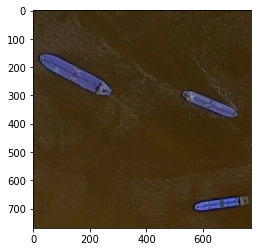

In [3]:
plt.imshow(ship)

In [4]:
ship.shape

(768, 768, 3)

## Section C: Model with one convolutional layer

### C.1 Convolutional Model with different dimensions of kernal

In [5]:
model_l1_k3x3 = Sequential()
model_l1_k3x3.add(Convolution2D(3, (3, 3), input_shape = ship.shape))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = model_l1_k3x3.predict(ship_batch)
# conv_ship = np.squeeze(conv_ship, axis = 0)
# print(conv_ship.shape)
# plt.imshow(conv_ship)

In [6]:
def visualize(ship_batch):
    conv_ship = np.squeeze(ship_batch, axis = 0)
    print(conv_ship.shape)
    conv_ship = (255 - conv_ship) / 255
    plt.imshow(conv_ship)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(766, 766, 3)


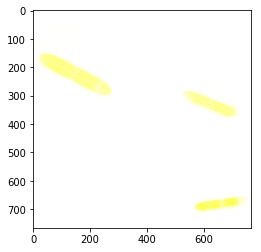

In [7]:
visualize(conv_ship)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(765, 765, 3)


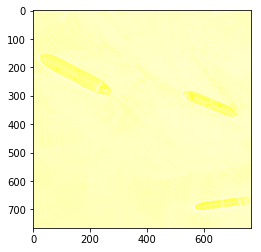

In [8]:
model_l1_k4x4 = Sequential()
model_l1_k4x4.add(Convolution2D(3, (4, 4), input_shape = ship.shape))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = model_l1_k4x4.predict(ship_batch)
visualize(conv_ship)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(763, 763, 3)


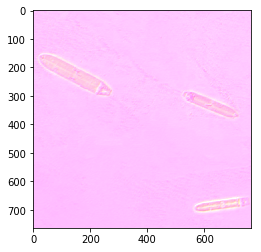

In [9]:
model_l1_k6x6 = Sequential()
model_l1_k6x6.add(Convolution2D(3, (6, 6), input_shape = ship.shape))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = model_l1_k6x6.predict(ship_batch)
visualize(conv_ship)

### C.2 Convolutional Model with different number of filter layers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(765, 765, 3)


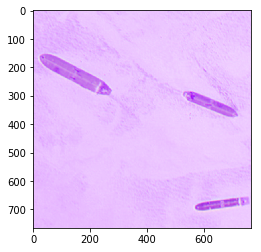

In [10]:
model_l1_f03 = Sequential()
model_l1_f03.add(Convolution2D(3, (4, 4), input_shape = ship.shape))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = model_l1_f03.predict(ship_batch)
visualize(conv_ship)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(765, 765, 4)


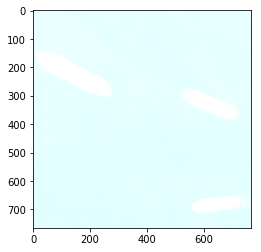

In [11]:
model_l1_f04 = Sequential()
model_l1_f04.add(Convolution2D(4, (4, 4), input_shape = ship.shape))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = model_l1_f04.predict(ship_batch)
visualize(conv_ship)

In [12]:
def visualize_fine_ship(ship_batch):
    conv_ship1 = np.squeeze(ship_batch, axis = 0)
    print(conv_ship1.shape)
    conv_ship2 = conv_ship1.reshape(conv_ship1.shape)
    print(conv_ship2.shape)
    plt.imshow(conv_ship2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(766, 766, 3)
(766, 766, 3)


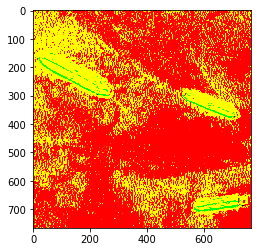

In [13]:
model_l1_vfs = Sequential()
model_l1_vfs.add(Convolution2D(3, (3, 3), input_shape = ship.shape))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = model_l1_vfs.predict(ship_batch)
visualize_fine_ship(conv_ship)

### C.3 One convolutional layer with one activation layer

(766, 766, 3)


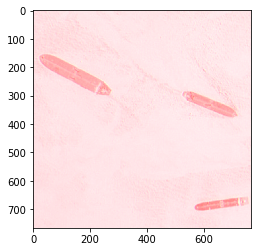

In [14]:
activation_layer_model = Sequential()
activation_layer_model.add(Convolution2D(3, (3, 3), input_shape = ship.shape))
activation_layer_model.add(Activation('relu'))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = activation_layer_model.predict(ship_batch)
visualize(conv_ship)

### C.4 One convolutional layer with one activation layer and one pooling layer

#### C.4.1 Pooling size = (2, 2)

(383, 383, 3)


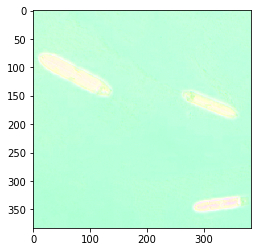

In [15]:
pooling_layer_model = Sequential()
pooling_layer_model.add(Convolution2D(3, (3, 3), input_shape = ship.shape))
pooling_layer_model.add(Activation('relu'))
pooling_layer_model.add(MaxPooling2D(pool_size = (2, 2)))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = pooling_layer_model.predict(ship_batch)
visualize(conv_ship)

#### C.4.2 Pooling size = (4, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(191, 191, 3)


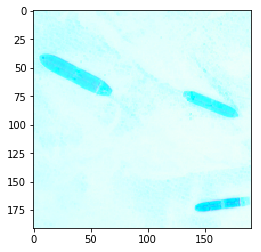

In [16]:
pooling_layer_model = Sequential()
pooling_layer_model.add(Convolution2D(3, (3, 3), input_shape = ship.shape))
pooling_layer_model.add(Activation('relu'))
pooling_layer_model.add(MaxPooling2D(pool_size = (4, 4)))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = pooling_layer_model.predict(ship_batch)
visualize(conv_ship)

#### C.4.3 Pooling size = (8, 8)

(95, 95, 3)


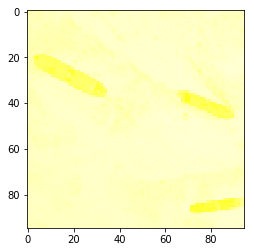

In [17]:
pooling_layer_model = Sequential()
pooling_layer_model.add(Convolution2D(3, (3, 3), input_shape = ship.shape))
pooling_layer_model.add(Activation('relu'))
pooling_layer_model.add(MaxPooling2D(pool_size = (8, 8)))
ship_batch = np.expand_dims(ship, axis = 0)
conv_ship = pooling_layer_model.predict(ship_batch)
visualize(conv_ship)

## Section D: Convolutional Model for VGG16

### D.1 The convolutional model

In [18]:
model = Sequential()

model.add(ZeroPadding2D((1,1), input_shape=(64, 64, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 3), activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 3), activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 3), activation='relu', padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(AveragePooling2D((5,5)))

model.add(Flatten())

### D.2 Visualization for layers

#### D.2.1 Visualization for layer 1

(2,)
(1, 66, 66, 64)


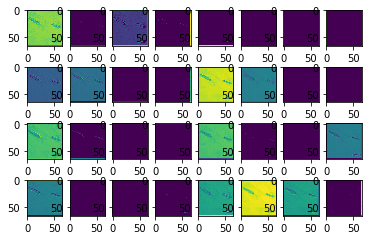

In [19]:
test_x = []
ship = cv2.imdecode(np.fromfile(r'vis_image\ship.jpg', dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
ship = cv2.resize(ship, (64, 64), interpolation=cv2.INTER_CUBIC)

ship = (255 - ship) / 255
ship = np.reshape(ship, (64, 64, 1))
test_x.append(ship)

###################################################################
layer = model.layers[1]
weight = layer.get_weights()
print(np.asarray(weight).shape)
###################################################################

model_v1 = Sequential()

model_v1.add(ZeroPadding2D((1, 1), input_shape=(64, 64, 1)))
model_v1.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model_v1.layers[1].set_weights(weight)

re = model_v1.predict(np.array(test_x))
print(np.shape(re))
re = np.transpose(re, (0,3,1,2))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(re[0][i]) #, cmap='gray'
plt.show()

#### D.2.2 Visualization for layer 2

6


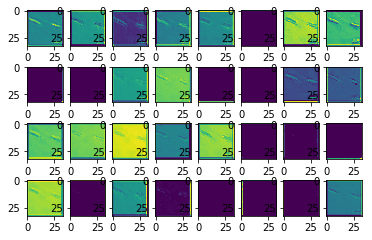

In [20]:
model_v2 = Sequential()

model_v2.add(ZeroPadding2D((1, 1), input_shape=(64, 64, 1)))
model_v2.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model_v2.add(BatchNormalization())
model_v2.add(MaxPooling2D(pool_size=(2, 2)))
model_v2.add(Dropout(0.25))

model_v2.add(Convolution2D(128, (3, 3), activation='relu', padding='same', ))
print(len(model_v2.layers))
layer1 = model.layers[1]
weight1 = layer1.get_weights()
model_v2.layers[1].set_weights(weight1)
layer5 = model.layers[5]
weight5 = layer5.get_weights()
model_v2.layers[5].set_weights(weight5)
re2 = model_v2.predict(np.array(test_x))
re2 = np.transpose(re2, (0,3,1,2))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(re2[0][i]) #, cmap='gray'
plt.show()

#### D.2.3 Visualization for layer 3

10


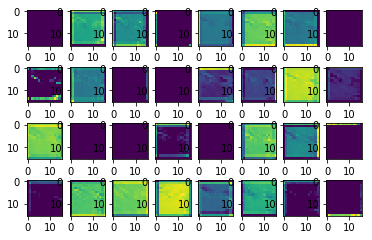

In [21]:
model_v3 = Sequential()

model_v3.add(ZeroPadding2D((1, 1), input_shape=(64, 64, 1)))
model_v3.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model_v3.add(BatchNormalization())
model_v3.add(MaxPooling2D(pool_size=(2, 2)))
model_v3.add(Dropout(0.25))

model_v3.add(Convolution2D(128, (3, 3), activation='relu', padding='same', ))
model_v3.add(BatchNormalization())
model_v3.add(MaxPooling2D(pool_size=(2, 2)))
model_v3.add(Dropout(0.25))

model_v3.add(Convolution2D(256, (3, 3), activation='relu', padding='same', ))

print(len(model_v3.layers))
layer1 = model.layers[1]
weight1 = layer1.get_weights()
model_v3.layers[1].set_weights(weight1)
layer5 = model.layers[5]
weight5 = layer5.get_weights()
model_v3.layers[5].set_weights(weight5)
layer9 = model.layers[9]
weight9 = layer9.get_weights()
model_v3.layers[9].set_weights(weight9)
re3 = model_v3.predict(np.array(test_x))
re3 = np.transpose(re3, (0,3,1,2))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(re3[0][i]) #, cmap='gray'
plt.show()

#### D.2.4 Visualization for layer 4

14


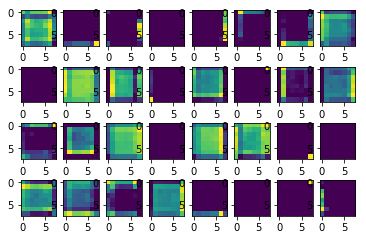

In [22]:
model_v4 = Sequential()

model_v4.add(ZeroPadding2D((1, 1), input_shape=(64, 64, 1)))
model_v4.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model_v4.add(BatchNormalization())
model_v4.add(MaxPooling2D(pool_size=(2, 2)))
model_v4.add(Dropout(0.25))

model_v4.add(Convolution2D(128, (3, 3), activation='relu', padding='same', ))
model_v4.add(BatchNormalization())
model_v4.add(MaxPooling2D(pool_size=(2, 2)))
model_v4.add(Dropout(0.25))

model_v4.add(Convolution2D(256, (3, 3), activation='relu', padding='same', ))
model_v4.add(BatchNormalization())
model_v4.add(MaxPooling2D(pool_size=(2, 2)))
model_v4.add(Dropout(0.25))

model_v4.add(Convolution2D(512, (3, 3), activation='relu', padding='same', ))

print(len(model_v4.layers))
layer1 = model.layers[1]
weight1 = layer1.get_weights()
model_v4.layers[1].set_weights(weight1)
layer5 = model.layers[5]
weight5 = layer5.get_weights()
model_v4.layers[5].set_weights(weight5)
layer9 = model.layers[9]
weight9 = layer9.get_weights()
model_v4.layers[9].set_weights(weight9)

re4 = model_v4.predict(np.array(test_x))
re4 = np.transpose(re4, (0,3,1,2))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(re4[0][i]) #, cmap='gray'
plt.show()

### D.3 Visualization of the kernal

In [23]:
def process(x):
    res = np.clip(x, 0, 1)
    return res

def dprocessed(x):
    res = np.zeros_like(x)
    res += 1
    res[x < 0] = 0
    res[x > 1] = 0
    return res

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

###     1
###     9
###     17
###     25


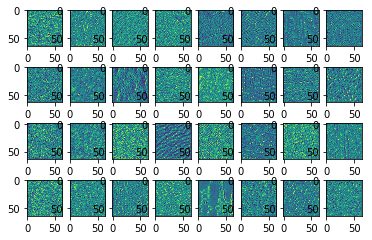

In [24]:
for i_kernal in range(32):
    input_img=model.input
    loss = K.mean(model.layers[5].output[:, :,:,i_kernal])
    # loss = K.mean(model.output[:, i_kernal])
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img, K.learning_phase()], [loss, grads])
    # we start from a gray image with some noise
    np.random.seed(0)
    num_channels=1
    img_height=img_width=64
    input_img_data = (255- np.random.randint(0,255,(1,  img_height, img_width, num_channels))) / 255.
    failed = False
    # run gradient ascent
    if i_kernal%8 == 0:
        print('###    ', i_kernal+1)
    loss_value_pre=0
    for i in range(100):
        # processed = process(input_img_data)
        # predictions = model.predict(input_img_data)
        loss_value, grads_value = iterate([input_img_data,1])
        # grads_value *= dprocessed(input_img_data[0])
        if i%1000 == 0:
            # print(' predictions: ' , np.shape(predictions), np.argmax(predictions))
            #print('Iteration %d/%d, loss: %f' % (i, 10000, loss_value))
            #print('Mean grad: %f' % np.mean(grads_value))
            if all(np.abs(grads_val) < 0.000001 for grads_val in grads_value.flatten()):
                failed = True
                print('Failed')
                break
            # print('Image:\n%s' % str(input_img_data[0,0,:,:]))
            if loss_value_pre != 0 and loss_value_pre > loss_value:
                break
            if loss_value_pre == 0:
                loss_value_pre = loss_value

        input_img_data += grads_value * 1 #e-3
    plt.subplot(4, 8, i_kernal+1)
    # plt.imshow((process(input_img_data[0,:,:,0])*255).astype('uint8'), cmap='Greys') #cmap='Greys'
    img_re = deprocess_image(input_img_data[0])
    img_re = np.reshape(img_re, (64,64))
    plt.imshow(img_re) #, cmap='Greys') #cmap='Greys'
plt.show()

## The end